### DSCI 100: GROUP PROJECT PROPOSAL

GROUP 10 - SECTION 007: Michelle Ho, Arian Afshari, Kyle Wise, Zidong Zhou

In [7]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)

In [2]:
# setting the seed such that the numbers used in the analysis are reasonably random
set.seed(3789)

In [13]:
# loading the data and mutating the class label column to factor 
heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", 
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak", 
                                        "slope", "ca", "thal", "num")) |>
mutate(num = as_factor(num))
heart_disease_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0


In [14]:
# partitioning the data into a training (75%) and testing (25%) set; num will be used as the class label
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)

heart_disease_train <- training(heart_disease_split)
heart_disease_train

heart_disease_test <- testing(heart_disease_split)
heart_disease_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0
34,1,2,150,214,0,1,168,0,0,?,?,?,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
34,0,2,130,161,0,0,190,0,0.0,?,?,?,0
35,0,4,140,167,0,0,150,0,0.0,?,?,?,0
35,1,2,120,308,0,2,180,0,0.0,?,?,?,0
36,1,2,120,166,0,0,180,0,0.0,?,?,?,0
36,1,3,112,340,0,0,184,0,1.0,2,?,3,0
36,1,3,130,209,0,0,178,0,0.0,?,?,?,0
37,1,3,130,194,0,0,150,0,0.0,?,?,?,0
37,1,4,130,315,0,0,158,0,0.0,?,?,?,0


In [20]:
heart_disease_train[heart_disease_train=="?"]<-NA
names <- c("sex","cp","fbs","restecg","exang","ca","thal","num","slope")
heart_disease_train[,names] <- lapply(heart_disease_train[,names] , factor)
heart_disease_train$trestbps=as.numeric(heart_disease_train$trestbps)
heart_disease_train$thalach=as.numeric(heart_disease_train$thalach)
heart_disease_train$oldpeak=as.numeric(heart_disease_train$oldpeak)
heart_disease_train$chol=as.numeric(heart_disease_train$chol)
summary(heart_disease_train)

      age        sex     cp        trestbps          chol         fbs     
 Min.   :28.00   0: 61   1: 9   Min.   : 92.0   Min.   : 85.0   0   :199  
 1st Qu.:42.00   1:159   2:75   1st Qu.:120.0   1st Qu.:206.0   1   : 14  
 Median :49.00           3:45   Median :130.0   Median :240.0   NA's:  7  
 Mean   :47.78           4:91   Mean   :132.6   Mean   :248.8             
 3rd Qu.:54.00                  3rd Qu.:140.0   3rd Qu.:280.0             
 Max.   :66.00                  Max.   :200.0   Max.   :603.0             
                                                NA's   :19                
 restecg       thalach      exang      oldpeak        slope        ca     
 0   :170   Min.   : 82.0   0:156   Min.   :0.0000   1   : 10   0   :  1  
 1   : 44   1st Qu.:120.0   1: 64   1st Qu.:0.0000   2   : 62   NA's:219  
 2   :  5   Median :140.0           Median :0.0000   3   :  1             
 NA's:  1   Mean   :138.6           Mean   :0.5491   NA's:147             
            3rd Qu.:155.0

In [21]:
#function for catergorical plotting
hist_plotting_function<-function(column){
heart_disease_data|>
mutate(a=fbs==num)|>
ggplot(aes(x=a))+geom_histogram(stat="count")
}


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


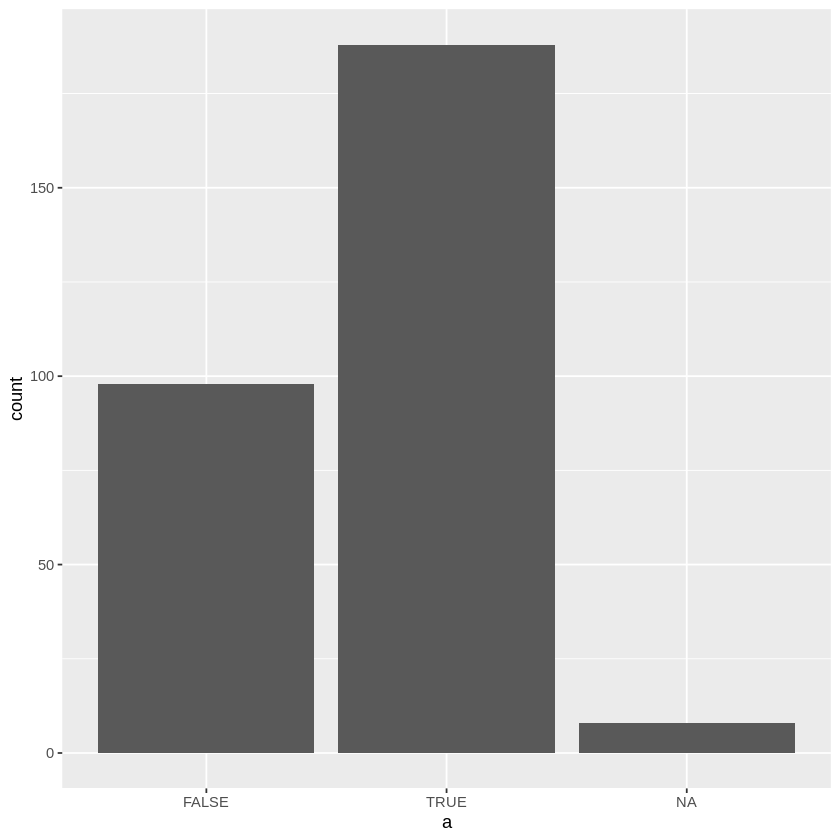

In [22]:
hist_plotting_function("sex")

In [23]:
heart_disease_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0
34,1,2,150,214,0,1,168,0,0,NA,NA,NA,0
